# TIM AI Academy

## Demonstração 14 - Principal Component Analysis (PCA).

### Prof. Dr. Ahirton Lopes (https://github.com/ahirtonlopes)

### PCA é "Machine Learning"?

E agora vamos dar uma pausa e discutiremos um pouco sobre o PCA, esse fantástico algoritmo de machine ... não é bem assim.

O PCA não é um algoritmo de aprendizagem de máquina completo, mas um algoritmo de aprendizagem não supervisionada.

Ou seja, o PCA é apenas uma transformação de nossos dados e tenta descobrir quais recursos explicam a maior variação em nossos dados.

## Imports diversos

In [48]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Nossos Dados

Vamos simular uma base de dados contendo atributos relativos a características de redes como latência (ms), delay/jitter (ms), perda de pacotes (%), Throughput(Mbps) e tempo de conexão (s).

In [49]:
# Simulando um dataset com duas classes: Rede Estável e Rede Instável
np.random.seed(42)
n_samples = 200

# Classe 0: Rede Estável
stable_network = {
    'Latency(ms)': np.random.normal(30, 5, n_samples // 2),
    'Jitter(ms)': np.random.normal(2, 0.5, n_samples // 2),
    'Packet Loss(%)': np.random.normal(0.2, 0.05, n_samples // 2),
    'Throughput(Mbps)': np.random.normal(120, 10, n_samples // 2),
    'Connection Time(s)': np.random.normal(25, 3, n_samples // 2),
    'Class': 0
}

# Classe 1: Rede Instável
unstable_network = {
    'Latency(ms)': np.random.normal(60, 10, n_samples // 2),
    'Jitter(ms)': np.random.normal(10, 2, n_samples // 2),
    'Packet Loss(%)': np.random.normal(1.5, 0.3, n_samples // 2),
    'Throughput(Mbps)': np.random.normal(80, 15, n_samples // 2),
    'Connection Time(s)': np.random.normal(40, 5, n_samples // 2),
    'Class': 1
}

# Criando o DataFrame
df_stable = pd.DataFrame(stable_network)
df_unstable = pd.DataFrame(unstable_network)
df = pd.concat([df_stable, df_unstable], ignore_index=True)

In [50]:
# Separando os rótulos
labels = df['Class']
features = df.drop(columns=['Class'])

## Pré-processamento: Padronizando os dados

In [51]:
# Padronizando os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Aplicando o PCA via scikit-learn

O PCA implementado no Scikit Learn utiliza um processo muito semelhante a outras funções de pré-processamento que o acompanham, ou seja, instancia-se um objeto PCA, localizamos então os componentes principais usando o método de ajuste e aplicamos a redução de rotação e dimensionalidade chamando *transform( )*.

Também podemos especificar quantos componentes queremos manter ao criar o objeto PCA.

In [52]:
# Aplicando PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

Agora podemos transformar esses dados em seus dois primeiros componentes principais:

In [53]:
# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Class'] = labels

## Visualização do PCA

Como observado em aula, é difícil visualizarmos dados de alta dimensão, podemos usar o PCA para encontrar os dois primeiros componentes principais e visualizar os dados nesse novo espaço bidimensional, com um único gráfico de dispersão. Antes de fazer isso, precisamos colocar nossos dados em escala para que cada recurso tenha uma única variação de unidade (no exemplo, via StandardScaler).

Que tal plotarmos as duas dimensões restantes?

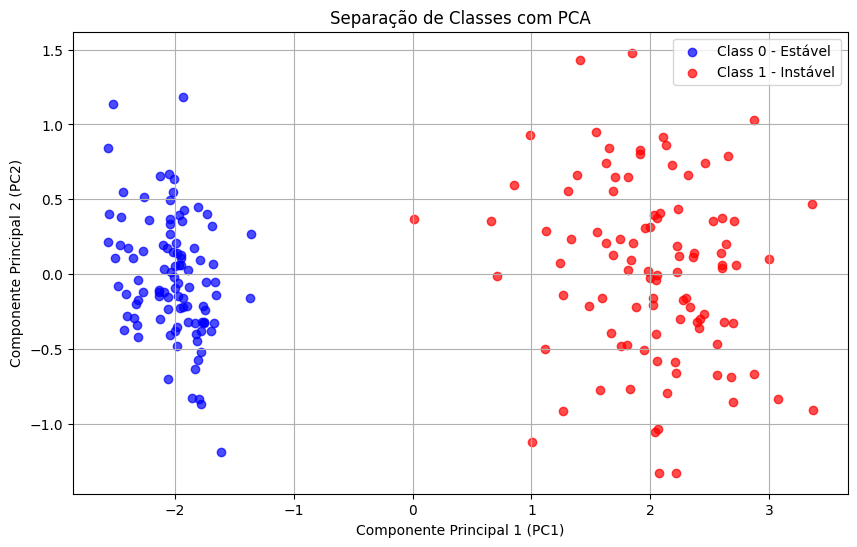

In [54]:
# Visualizando os dados reduzidos
plt.figure(figsize=(10, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(
        pca_df[pca_df['Class'] == label]['PC1'],
        pca_df[pca_df['Class'] == label]['PC2'],
        alpha=0.7,
        label=f"Class {label} - {'Estável' if label == 0 else 'Instável'}",
        color=color
    )
plt.title("Separação de Classes com PCA")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Variância explicada pelos componentes principais:", explained_variance)

Variância explicada pelos componentes principais: [0.85605554 0.05092218]


Pelo que podemos observar, a partir do uso desses dois componentes, podemos separar facilmente essas duas classes.

## Interpretando os componentes

Infelizmente, com esse grande poder de redução da dimensionalidade, vem o custo de poder entender facilmente o que esses componentes representam.

A separação entre as classes no gráfico indica que o PCA capturou diferenças significativas nas métricas que definem a "Rede Estável" e a "Rede Instável".

Os componentes correspondem a combinações dos recursos originais, os próprios componentes são armazenados como um atributo do objeto PCA ajustado:


In [56]:
pca.components_

array([[ 0.44449449,  0.45107005,  0.46292285, -0.43327932,  0.44377012],
       [-0.22455288,  0.35605238,  0.12108376,  0.76055185,  0.47927269]])

Já a variância explicada ajuda a entender o quanto da informação original foi retida nos dois componentes principais.

Esse exemplo é relevante para análises em telecom, como classificação de tipos de rede ou identificação de problemas de desempenho.


In [57]:
df_comp = pd.DataFrame(pca.components_, columns=features.columns, index=['PC1', 'PC2'])
df_comp

,Latency(ms),Jitter(ms),Packet Loss(%),Throughput(Mbps),Connection Time(s)
PC1,0.444494,0.451070,0.462923,-0.433279,0.443770
PC2,-0.224553,0.356052,0.121084,0.760552,0.479273


Nesse array matricial numpy, cada linha representa um componente principal, e cada coluna se relaciona novamente aos recursos originais. Ainda, podemos visualizar esse relacionamento com um mapa de calor.

Podem notar que esse mapa de calor, e a barra de cores, representam basicamente a correlação entre os vários recursos e o próprio componente principal.

<Axes: >

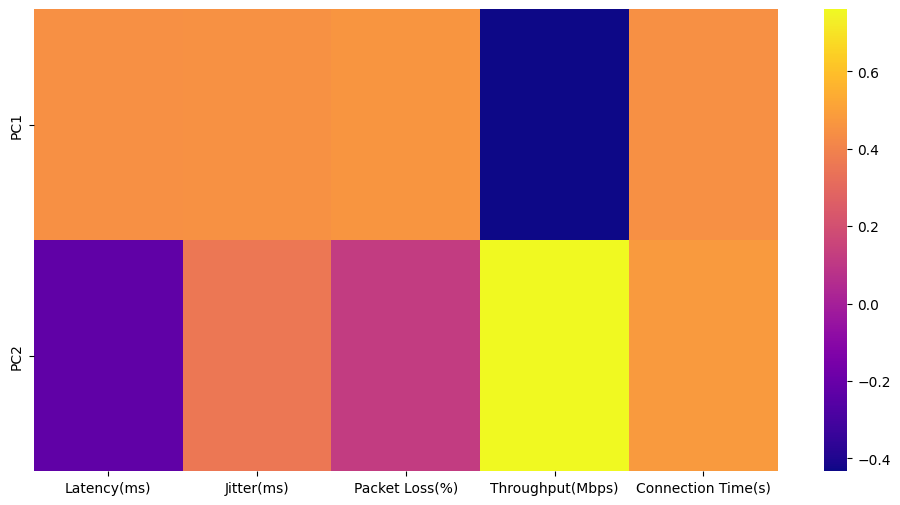

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)